# Projeto 2 - Ciência dos Dados

## **Membros**

**Gabriel Salvator Benatar**

**Matheus Freitas Sant'Ana**

___
## **Imports necessários**

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

___
# Classificador de popularidade de música do Spotify

Esse projeto tem como principal objetivo prever se uma música vai ser popular ou não.

# Introdução:


Decidimos criar um classificador de popularidade que deve prever se uma música vai ser popular ou não. Cada musica tem várias variáveis, como por exemplo: acustica, energia, tempo etc. Nosso classificador analisará cada uma dessas variáveis e chegara em um valor numérico, esse valor será o valor de popularidade e definirá se uma música é ou não popular

## Definição de variáveis:


acousticness = É uma medida de de confiança de 0 a 1 que indica se a faixa é acústica, quanto mais próximo o valor é de 1, maior é a confiança da faixa ser acústica

artists = indica o nome do artista

danceability = É uma medida de confiança de 0 a 1 que indica o quanto a musica é adequada para dançar, para isso ela analisa uma combinação de elementos musicais, como: ritmo, estabilidade de ritmo, força de batida e regularidade geral. Se o valor é mais próximo de 0, ele é menos dançável, e mais próximo de um é mais dançável

___
## Lendo o Dataframe a ser utilizado 

In [2]:
# Dada uma música, quais vão ser os seus audio features!
df = pd.read_csv('dataframe.csv')

In [3]:
df.head()

,Unnamed: 0,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,8,1921,0.4150,60.936,0.9630,1921
1,1,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",5,1921,0.0366,80.954,0.0594,1921
2,2,0.996,['John McCormack'],0.518,159507,0.203,0,5uNZnElqOS3W4fRmRYPk4T,0.000000,0,0.115,-10.589,1,The Wearing of the Green,6,1921,0.0615,66.221,0.4060,1921
3,3,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,1SCWBjhk5WmXPxhDduD3HM,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,0.0594,1921
4,4,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,4,1921,0.0380,101.665,0.2530,1921


In [4]:
df.shape

(168592, 20)

___
Antes de começarmos a limpeza do _Dataframe_, é interessante entender a correlação entre cada coluna  de forma a entender quais delas são interessantes de serem utilizadas a princípio. Para isso, vamos plotar uma amtriz que faz a correlação entre as colunas do _Dataframe_. 

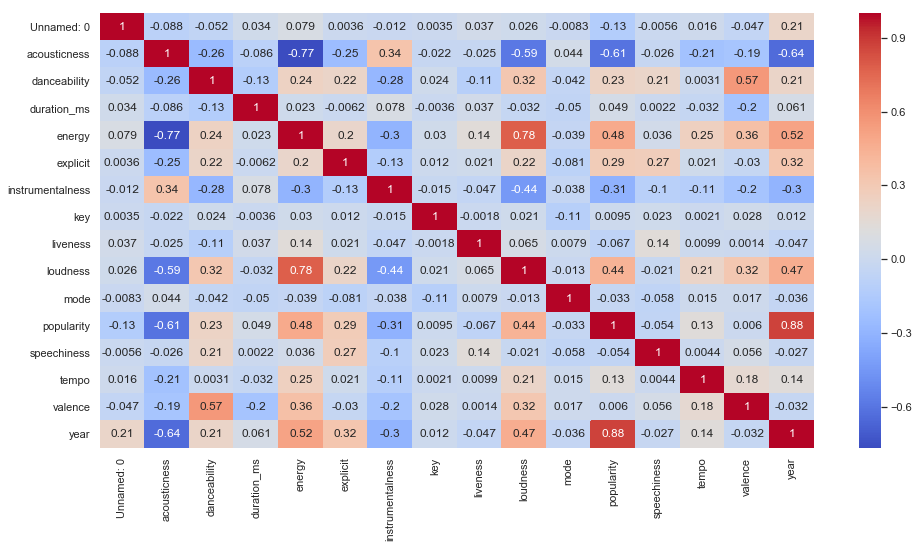

In [ ]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
corr = df.corr()
sns.heatmap(corr,annot=True,cmap="coolwarm")

As "células" que têm uma cor mais quente indicam maior correlação e as que têm cores mais frias indicam menor correlação. Para nós, que queremos prever a popularidade de uma música com base em seus respectivos _audio features_, vamos analisar aquelas que têm relação linear com a coluna _popularity_. Nota-se de cara que _popularity_ tem uma alta correlação com (foram listadas em ordem decrescente de correlação com _popularity_):

* _year_ : sendo a maior correlação de colunas de TODO o dataframe, com uma correlação de 0.88, pode-se dizer que o ano tem altíssima influência na popularidade de uma música.

* _energy_ e _loudness_ :  com valores praticamente iguais de correlação (0.48 e 0.44, respectivamente), também têm uma alta influência na popularidade de uma música.

* _explicit_ e _danceability_ : com valores praticam4ente iguais de correlação (0.29  0.23, respectivamente), têm correlação com a popularidade de uma música, mesmo que não muito alta. 

Além disso, talvez não seja interessante utilizar as outras colunas no nosso modelo, uma vez que são praticamente indiferentes à popularidade da música (_valence_, _tempo_, _speechinesss_, _mode_, _liveness_, _key_, _duration__ms_) ou que não tem relação linear com popularidade (_acousticness_ e _instrumentalness_).

___
# Limpeza do Dataframe

Com base no que foi dito acima, vamos filtrar o _Dataframe_ apenas com as variáveis explicativas para a construção de nosso modelo.

In [ ]:
# Cria os Dataframes com as colunas que nos interessam. 

lista_colunas = ['release_date', 'energy', 'loudness', 'explicit', 'danceability']

for i in lista_colunas:
    df_string = 'df_'
    column_string = i
    x = df.loc[:, ['name', i]]
    globals()[df_string+column_string] = x

O código acima cria todos os _Dataframes_ desejados. Plota-se um aqui para servir de exemplo.

In [ ]:
df_energy.head()

,name,energy
0,Clancy Lowered the Boom,0.341
1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",0.211
2,The Wearing of the Green,0.203
3,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",0.211
4,When Irish Eyes Are Smiling,0.193


___
## **Análise da popularidade das músicas do _Dataframe_**


Plotando o histograma da popularidade das músicas, percebemos que a maioria das músicas **são pouco populares** e se encontram no intervalo de  popularidade entre 0 e 5. No entanto, após esse 'pico' de valores de músicas não-populares, a distribuição da variável se comporta similarmente àquela de uma normal! 

C:\Users\matfs\Downloads\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Histograma dos valores de popularidade')

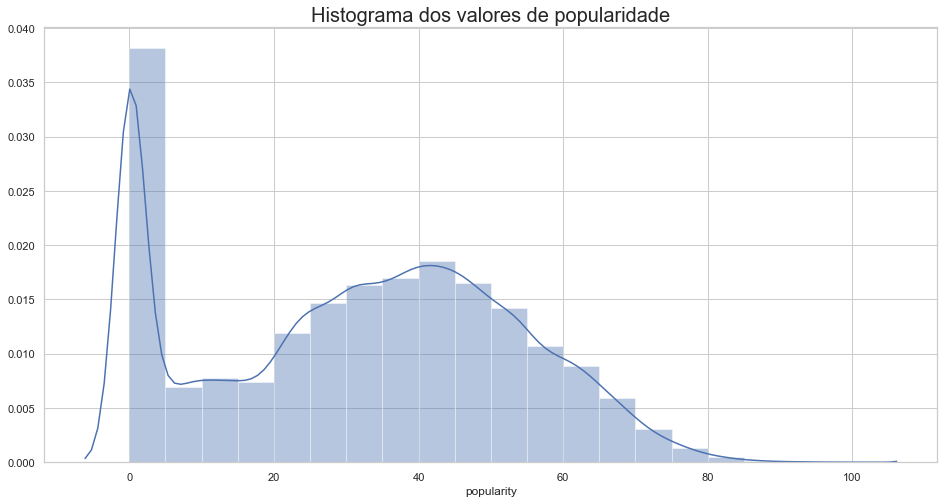

In [ ]:
plt.figure(figsize=(16, 8))
sns.distplot(df.popularity,bins=20)
plt.title('Histograma dos valores de popularidade', fontsize=20, ha='center')

Para ilustrar que a distribuição se assemelha à de uma normal, vamos plotar dois _probplots_: um com todos os valores e outro com apenas os valores após o pico, cuja distribuição deve se "encaixar" com a de uma normal! 

In [ ]:
plt.figure(figsize=(16,8))

df_popAcimaCinco = df.loc[df.popularity >= 5, ['popularity']]

plt.subplot(121)
stats.probplot(df.popularity, dist="norm", plot=plt)
plt.title('Probplot de popularidade de todas as das músicas', fontsize=20, ha='center')


plt.subplot(122)
stats.probplot(df_popAcimaCinco['popularity'], dist="norm", plot=plt)
plt.title('Probplot apenas com músicas com valores de popularidade acima de 5', fontsize=15, ha='center')

plt.tight_layout()

Como pode-se notar acima, o gráfico à esuqerda, que demonstra o _probplot_ de todos os valores se encaixa bem menos com a curva da normal do que o da direita, que apenas utiliza valores de popularidade acima de 5 de músicas. Além disso, esse _probplot_ da direita se encaixa **razoavelmente bem** a uma normal, confirmando nossa hipótese!

___
## **Análise das _audio features_**

Para entender melhor cada variável explicativa, pota-se um gráfico que demonstra a média de cada _audio feature_ ao longo dos anos:

In [ ]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
columns = ["acousticness","danceability","energy","speechiness","liveness","valence"]
for col in columns:
    x = df.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('Características de cada audio feature presente nas músicas ao longo dos anos')
ax.set_ylabel('Medida')
ax.set_xlabel('Ano')

Como pontos notáveis do gráfico acima, nota-se:

* As _audio features_ mais presentes nas mpusicas dos últimos anos casam com as _features_ mais presente em músicas populares. Portanto, pode-se fazer a hipótese de que **músicas populares recentes** agregam a cultura geral de músicas da época, portanto, suas _features_ serão as predominantes em certo ano (dos mais recentes!).

* A variável _acousticness_ é bem menos presente nas músicas dos dias de hoje em comparação com antigamente, sendo até a audio feature  mais utilizada nas músicas antigas (de 1920 até 1960 mais ou menos, foi a variável com mudança mais acentuada ao longo dos anos). Essa informação casa com a ausência de relação linear entre _popularity_ e _acousticness_ percebida na matriz plotada no começo dessa análise exploratória. Uma possível explicação disso seria a hipótese que fizemos no primeiro tópico: como músicas populares não tem muita acusticidade, faz sentido que menos músicas com muita _acousticness_ sejam lançadas. 

* A outra _audio feature_ que passou por uma mudança mais radical no uso das músicas foi a _energy_. Uma das variáveis mais correlacionadas com a popularidade, faz sentido que a média de seu uso nas músicas de cada ano seja maior, seguindo a lógiva da hipótese que fizemos no primeiro tópico.

* As outras vaiáveis, (_speechiness_, _liveness_,  _danceability_ e _valence_) se mantiveram mais ou menos constantes ao longo dos anos. Inclusive, nota-se que as médias de uso nas músicas de _danceability_ e _valence_ eram muito parecidas antigamente, coisa que não acontece mais atualmente.

___

## Arrumando coluna da data de lançamento

Para a variável de data de lançamento, vamos considerar apenas o ano em que uma música foi lançada. No Dataframe que temos, as músicas mais antigas tem apenas o ano (que é o que queremos), porém, as mais recentes tem mês e dia também, conforme é mostrado abaixo:

In [ ]:
print("Exemplo de data de lançamento de música antiga: {}".format(df_release_date.release_date[200]))
print("Exemplo de data de lançamento de música mais recente: {}".format(df.release_date[90000]))

Por isso, temos que corrigir isso para apenas mostrar o ano de lançamento.

In [ ]:
for i in range(len(df.release_date)):
    if df.release_date[i].find('-') != -1:
        df.release_date[i] = df.release_date[i][:4]

In [ ]:
print("Exemplo de data de lançamento de música mais recente (com correção): {}".format(df.release_date[90000]))

Com isso, corrigimos os valores de __release_date__ para apenas mostrar o ano em que uma música foi lançada, ao invés da data inteira, e agora podemos utilizar esses dados como variável aleatória!

___
## **Random Forest**

O primeiro método que iremos utilizar será o Random Forest. Primeiramente, temos que definir o que serão as _features_ (variáveis explicativas) que serão utilizadas para prever os _labels_ (variável resposta). Sendo assim, as nossas features, como já foi explicado, serão as variáveis filtradas do DataFrame, e os _labels_ serão os valores de popuaridade das músicas.

In [ ]:
labels = df.popularity
df_features = df.loc[:, ['energy', 'danceability', 'loudness', 'explicit', 'release_date']]
df_features.tail()

Para separar o nosso _Dataframe_ em base de treinamento, em que "ensinamos" nosso modelo como classificar a popularidade de uma música (variável resposta) com base nas _audio features_ escolhidas (variável explicativa), mostrando para ele a "resposta". Depois, separamos ele com a base teste, em que ocultamos a variável resposta de popularidade e pedimos para ele classificar a popularidade com base no que foi aprendido com a base de treinamento! Para esse _Dataframe_ separamos 75% dos valores para base de treinamento e os outros 25% restantes para a base de teste.

In [ ]:
from sklearn.model_selection import train_test_split

# Separando as bases de treinamento e teste
train_features, test_features, train_labels, test_labels = train_test_split(df_features, labels, test_size = 0.25, random_state = 42)

In [ ]:
print("Tamanho = (número de linhas, número de colunas)")
print('Base de treinamento com feaatures tamanho:', train_features.shape)
print('Base de treinamento com labels tamanho:', train_labels.shape)
print('Base de teste com features tamanho:', test_features.shape)
print('Base de teste com labels tamanho:', test_labels.shape)

Treinando o modelo:

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Criando modelo utilizando 1000 trees 
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# Treinando nosso modelo
rf.fit(train_features, train_labels);

Pedindo para o modelo classificar o _test labels_ usando o _test features_, além de calcular a média de erro asboluto, que representa a diferença entre os valores preditos e os reais:

In [ ]:
# Utilizando o método de predição random forest para prever test features
predictions = rf.predict(test_features)

# Calculando erros absolutos.
errors = abs(predictions - test_labels)

print('Média de erro absoluto:', round(np.mean(errors), 2), 'de popularidade.')

In [ ]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (round(np.mean(errors), 2) / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Acurácia:', round(accuracy, 2), '%.')